In [1]:
import pandas as pd
import matplotlib as plt
import os
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(color_codes=True)

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
df = pd.read_csv("feature_engineering.csv")   
df.head()

,date_activ,date_end,date_modif_prod,date_renewal,forecast_discount_energy,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,pow_max,churn,con_duration,date_activ_diff,date_end_diff,date_modif_prod_diff,date_renewal_diff,channel_sales_epum,channel_sales_ewpa,channel_sales_fixd,channel_sales_foos,channel_sales_lmke,channel_sales_sddi,channel_sales_usil,origin_up_MISS,origin_up_ewxe,origin_up_kamk,origin_up_ldks,origin_up_lxid,origin_up_usap,log_cons_12m,log_cons_gas_12m,log_cons_last_month,log_imp_cons,log_forecast_cons_12m,log_forecast_cons_year,log_forecast_discount_energy,log_forecast_meter_rent_12m,price_date,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3,mean_6m_price_p1_var,mean_6m_price_p2_var,mean_6m_price_p3_var,mean_6m_price_p1_fix,mean_6m_price_p2_fix,mean_6m_price_p3_fix,mean_6m_price_p1,mean_6m_price_p2,mean_6m_price_p3,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3
0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0.114481,0.098142,40.606701,1,25.44,25.44,2,678.99,43.648,1,36,30.555042,-5.453911,2.004148,6.308138,0,0,0,1,0,0,0,0,0,0,0,1,0,0.0,10.914124,0.0,0.0,0.0,0.0,0.0,1.022451,2015-01-01,0.124787,0.100749,0.06653,40.942265,22.35201,14.90134,41.067053,22.45276,14.967871,0.123598,0.098104,0.061525,41.318559,20.364442,13.576296,41.442157,20.462545,13.637821,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687
1,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0.114481,0.098142,40.606701,1,25.44,25.44,2,678.99,43.648,1,36,30.555042,-5.453911,2.004148,6.308138,0,0,0,1,0,0,0,0,0,0,0,1,0,0.0,10.914124,0.0,0.0,0.0,0.0,0.0,1.022451,2015-02-01,0.124787,0.100749,0.06653,40.942265,22.35201,14.90134,41.067053,22.45276,14.967871,0.123598,0.098104,0.061525,41.318559,20.364442,13.576296,41.442157,20.462545,13.637821,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687
2,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0.114481,0.098142,40.606701,1,25.44,25.44,2,678.99,43.648,1,36,30.555042,-5.453911,2.004148,6.308138,0,0,0,1,0,0,0,0,0,0,0,1,0,0.0,10.914124,0.0,0.0,0.0,0.0,0.0,1.022451,2015-03-01,0.124787,0.100749,0.06653,40.942265,22.35201,14.90134,41.067053,22.45276,14.967871,0.123598,0.098104,0.061525,41.318559,20.364442,13.576296,41.442157,20.462545,13.637821,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687
3,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0.114481,0.098142,40.606701,1,25.44,25.44,2,678.99,43.648,1,36,30.555042,-5.453911,2.004148,6.308138,0,0,0,1,0,0,0,0,0,0,0,1,0,0.0,10.914124,0.0,0.0,0.0,0.0,0.0,1.022451,2015-04-01,0.124787,0.100749,0.06653,40.942265,22.35201,14.90134,41.067053,22.45276,14.967871,0.123598,0.098104,0.061525,41.318559,20.364442,13.576296,41.442157,20.462545,13.637821,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687
4,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0.114481,0.098142,40.606701,1,25.44,25.44,2,678.99,43.648,1,36,30.555042,-5.453911,2.004148,6.308138,0,0,0,1,0,0,0,0,0,0,0,1,0,0.0,10.914124,0.0,0.0,0.0,0.0,0.0,1.022451,2015-05-01,0.124787,0.100749,0.06653,40.942265,22.35201,14.90134,41.067053,22.45276,14.967871,0.123598,0.098104,0.061525,41.318559,20.364442,13.576296,41.442157,20.462545,13.637821,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687


In [3]:
df = df.drop(columns = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'price_date'], axis = 1)

In [4]:
#First we need to specify features and target 
y = df['churn']
X = df.drop('churn',axis=1)

In [5]:
#Check the binary target
X.value_counts()

forecast_discount_energy  forecast_price_energy_off_peak  forecast_price_energy_peak  forecast_price_pow_off_peak  has_gas  margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  pow_max  con_duration  date_activ_diff  date_end_diff  date_modif_prod_diff  date_renewal_diff  channel_sales_epum  channel_sales_ewpa  channel_sales_fixd  channel_sales_foos  channel_sales_lmke  channel_sales_sddi  channel_sales_usil  origin_up_MISS  origin_up_ewxe  origin_up_kamk  origin_up_ldks  origin_up_lxid  origin_up_usap  log_cons_12m  log_cons_gas_12m  log_cons_last_month  log_imp_cons  log_forecast_cons_12m  log_forecast_cons_year  log_forecast_discount_energy  log_forecast_meter_rent_12m  mean_year_price_p1_var  mean_year_price_p2_var  mean_year_price_p3_var  mean_year_price_p1_fix  mean_year_price_p2_fix  mean_year_price_p3_fix  mean_year_price_p1  mean_year_price_p2  mean_year_price_p3  mean_6m_price_p1_var  mean_6m_price_p2_var  mean_6m_price_p3_var  mean_6m_price_p1_fix  mean_6m_pric

In [6]:
#Check the binary target
y.value_counts()

0    158136
1     17003
Name: churn, dtype: int64

As we can see, the y(churn) is imbalanced

In [7]:
#Spliting dataset 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.2,random_state=10)

# Base Models
We are going to quickly test the fit of 6 different models

 - Logistic Regression: basic linear classifier (good to baseline)
 - Random Forest: ensemble bagging classifier
 - K-Nearest Neighbors: instance based classifier
 - Support Vector Machines: maximum margin classifier
 - Gaussian Naive Bayes: probabilistic classifier
 - XGBoost: ensemble (extreme!) boosting classifier

In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_validate, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


In [9]:
from sklearn import model_selection
from sklearn.utils import class_weight 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Lightweight script to test many models and find winners
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
    
    dfs=[]
    models =[('LogReg', LogisticRegression()), 
        ('RF', RandomForestClassifier ()),
        ('KNN', KNeighborsClassifier ()),
        ('GNB', GaussianNB()),
        ('XGB', XGBClassifier(eval_metric='mlogloss'))
            ]
    results = []
    names = []
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    target_names = ['malignant', 'benign']
    for name, model in models:
        kfold = model_selection.KFold (n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_test = y_test.reset_index(drop=True)  # fix for index length mismatch error
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
        final = pd.concat(dfs, ignore_index=True)
    return final


In [10]:
run_exps(X_train, y_train, X_test, y_test)

LogReg
              precision    recall  f1-score   support

   malignant       0.90      1.00      0.95     31614
      benign       0.22      0.01      0.01      3414

    accuracy                           0.90     35028
   macro avg       0.56      0.50      0.48     35028
weighted avg       0.84      0.90      0.86     35028

RF
              precision    recall  f1-score   support

   malignant       1.00      1.00      1.00     31614
      benign       1.00      1.00      1.00      3414

    accuracy                           1.00     35028
   macro avg       1.00      1.00      1.00     35028
weighted avg       1.00      1.00      1.00     35028

KNN
              precision    recall  f1-score   support

   malignant       1.00      1.00      1.00     31614
      benign       1.00      1.00      1.00      3414

    accuracy                           1.00     35028
   macro avg       1.00      1.00      1.00     35028
weighted avg       1.00      1.00      1.00     35028

GNB
 

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,1.519278,0.075797,0.901367,0.836051,0.901367,0.856812,0.631136,LogReg
1,1.685493,0.052858,0.903362,0.839777,0.903362,0.859633,0.639928,LogReg
2,1.635628,0.056844,0.902541,0.837028,0.902541,0.858444,0.643490,LogReg
3,1.544868,0.053858,0.899686,0.848123,0.899686,0.854183,0.636108,LogReg
4,1.706596,0.052858,0.902791,0.843224,0.902791,0.858539,0.631967,LogReg
5,24.538983,1.060502,1.000000,1.000000,1.000000,1.000000,1.000000,RF
6,24.256885,1.050014,1.000000,1.000000,1.000000,1.000000,1.000000,RF
7,25.955884,1.132101,1.000000,1.000000,1.000000,1.000000,1.000000,RF
8,24.484901,1.073071,1.000000,1.000000,1.000000,1.000000,1.000000,RF
9,30.357383,1.911874,1.000000,1.000000,1.000000,1.000000,1.000000,RF


In [11]:
final=run_exps(X_train,y_train,X_test,y_test)
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model==model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)
        
bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
time_metrics = ['fit_time','score_time'] # fit time metrics
## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')
## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

LogReg
              precision    recall  f1-score   support

   malignant       0.90      1.00      0.95     31614
      benign       0.22      0.01      0.01      3414

    accuracy                           0.90     35028
   macro avg       0.56      0.50      0.48     35028
weighted avg       0.84      0.90      0.86     35028

RF
              precision    recall  f1-score   support

   malignant       1.00      1.00      1.00     31614
      benign       1.00      1.00      1.00      3414

    accuracy                           1.00     35028
   macro avg       1.00      1.00      1.00     35028
weighted avg       1.00      1.00      1.00     35028

KNN
              precision    recall  f1-score   support

   malignant       1.00      1.00      1.00     31614
      benign       1.00      1.00      1.00      3414

    accuracy                           1.00     35028
   macro avg       1.00      1.00      1.00     35028
weighted avg       1.00      1.00      1.00     35028

GNB
 

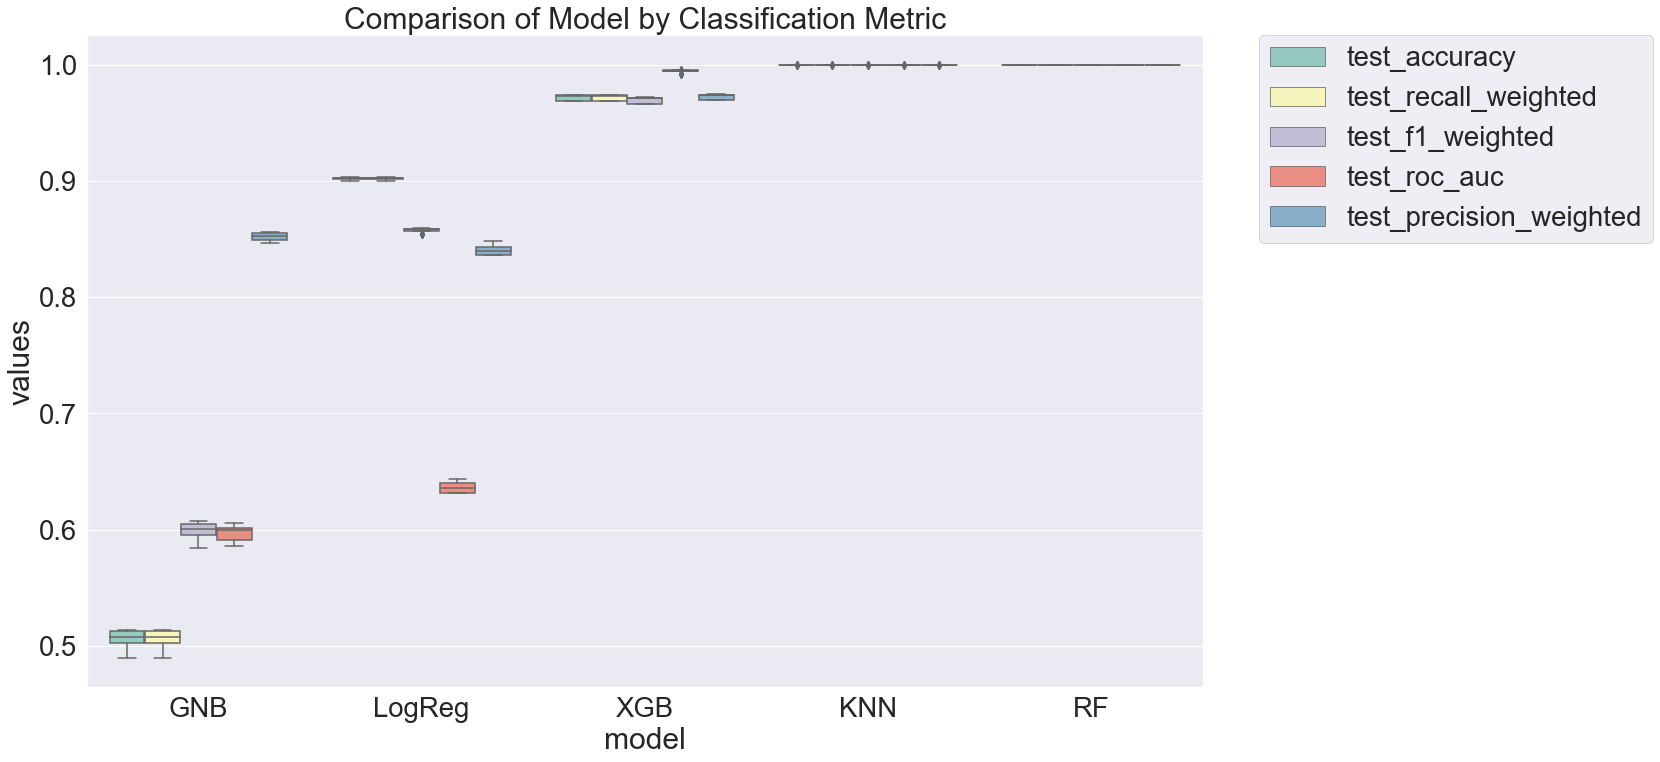

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20, 12))
sns.set(font_scale = 2.5)
g = sns.boxplot(x="model", y="values", hue = "metrics", data= results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png',dpi=300)

It is clearly that GNBs fit our data poorly across alomast all the metrics, and the XGBoost,  and Random Forest fit the data very well

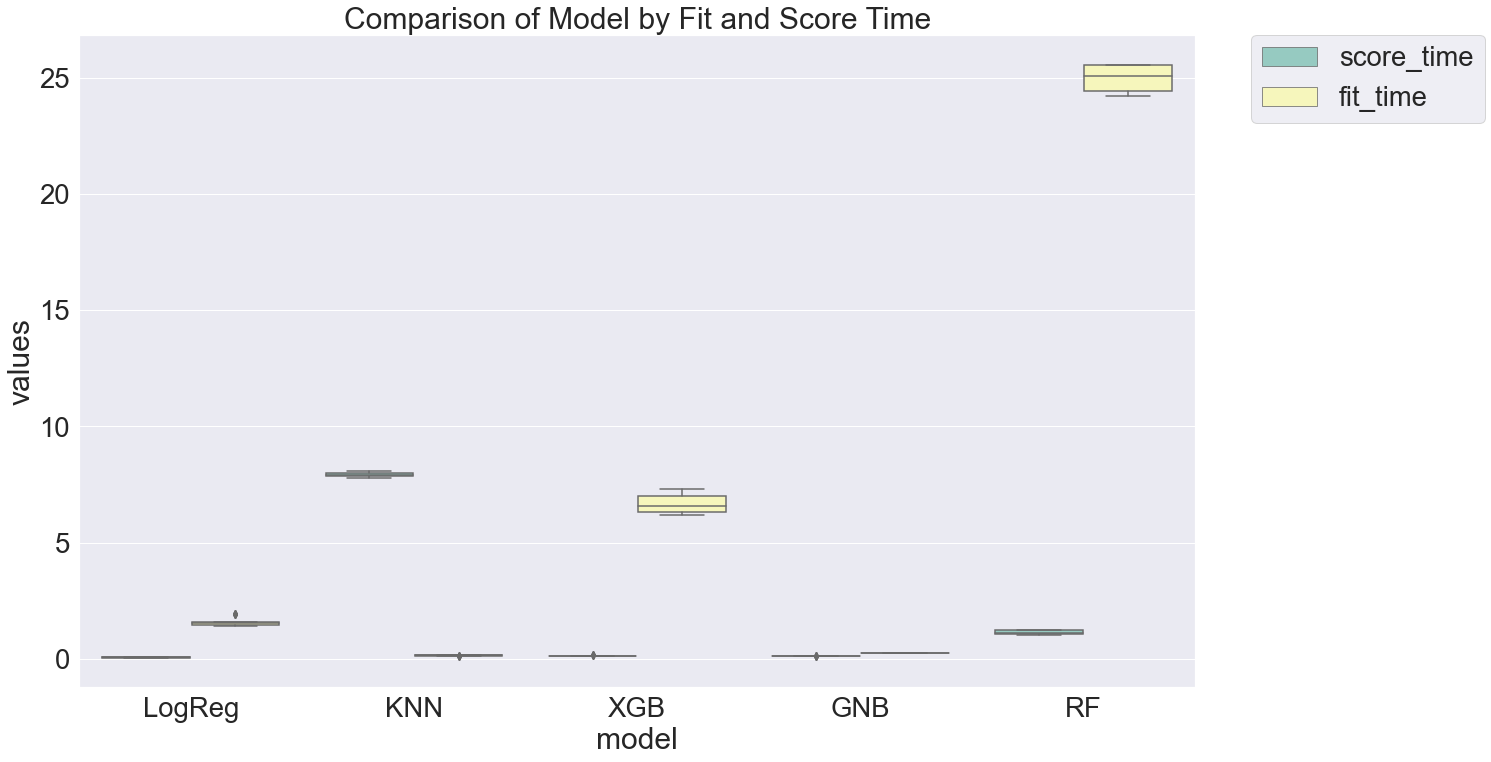

In [13]:
plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_fit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Fit and Score Time')
plt.savefig('./benchmark_models_time.png',dpi=300)

'RF' and 'XGB' have the highest time but there's a comparable difference between 'RF' and 'XGB'

In [14]:
metrics = list(set(results_long_nofit.metrics.values))
bootstrap_df.groupby(['model'])[metrics].agg([np.std, np.mean])

test_precision_weighted           test_recall_weighted            \
                           std      mean                  std      mean   
model                                                                     
GNB                   0.003503  0.851629             0.007633  0.506525   
KNN                   0.000224  0.999630             0.000224  0.999630   
LogReg                0.004561  0.840247             0.001332  0.901873   
RF                    0.000000  1.000000             0.000000  1.000000   
XGB                   0.002210  0.972494             0.002358  0.971774   

       test_accuracy           test_f1_weighted           test_roc_auc  \
                 std      mean              std      mean          std   
model                                                                    
GNB         0.007633  0.506525         0.007396  0.599590     0.006872   
KNN         0.000224  0.999630         0.000224  0.999630     0.000003   
LogReg      0.001332  0.901873         0.001949  0.857444     0.004794   
RF          0.000000  1.000000         0.000000  1.000000     0.000000   
XGB         0.002358  0.971774         0.002716  0.969634     0.001154   

                  
            mean  
model             
GNB     0.596544  
KNN     0.999996  
LogReg  0.636736  
RF      1.000000  
XGB     0.994525

In [15]:
time_metrics = list(set(results_long_fit.metrics.values))
bootstrap_df.groupby(['model'])[time_metrics].agg([np.std, np.mean])

score_time            fit_time           
              std      mean       std       mean
model                                           
GNB      0.001524  0.128246  0.002040   0.231885
KNN      0.120080  7.927818  0.012286   0.131626
LogReg   0.005419  0.051469  0.199996   1.595593
RF       0.106434  1.141869  0.532010  25.025033
XGB      0.010750  0.117187  0.425643   6.643367

RF is the model we would choose for this particular dataset

# Model Finetuning

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create the random grid
params = {
    'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)]+[None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create the model 
rf = RandomForestClassifier()

# Random search of parameters, using 5-fold cross validation 
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = params, n_iter = 1, cv = 5, verbose=3, random_state=1001, n_jobs = -1)

# Fit the random search model 
rf_random.fit(X_train, y_train)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=1,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=1001, verbose=3)

In [17]:
best_random = rf_random.best_params_
best_random = {'n_estimators': 600,
               'min_samples_split': 5,
               'min_samples_leaf': 1,
               'max_features': 'auto',
               'max_depth': 30}

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Create a model with the parameters found
model_random = RandomForestClassifier(n_estimators = 600,
                                       min_samples_split = 5,
                                       min_samples_leaf = 1,
                                       max_features= 'auto',
                                       max_depth = 30)

fprs, tprs, score = [], [], []

In [19]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits = 5, random_state = 1001, shuffle=True)

In [20]:
from sklearn import metrics

def compute_roc_auc(model_, index):
    y_predict = model_.predict_proba(X_test.iloc[index])[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test.iloc[index], y_predict)
    auc_score = metrics.auc(fpr, tpr)
    return fpr, tpr, auc_score

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc

# create a random forest model with the best parameters
model_random = RandomForestClassifier(n_estimators= 600, max_depth=30, 
                                       max_features='auto', min_samples_split=5, 
                                       bootstrap=True, random_state=1001)

# predict class probabilities using 5-fold cross-validation
y_proba_cv = cross_val_predict(model_random, X, y, cv=5, method='predict_proba')

fprs, tprs, score = [], [], []

# compute ROC curve and AUC score for each fold
for i in range(5):
    fpr, tpr, _ = roc_curve(y, y_proba_cv[:,1], pos_label=1)
    auc_score = auc(fpr, tpr)
    score.append(auc_score)
    fprs.append(fpr)
    tprs.append(tpr)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

# Set random state for reproducibility
np.random.seed(13)

# Create a RandomForestClassifier with the best parameters found
best_random = {'n_estimators': 600,
               'max_depth': 30,
               'min_samples_split': 5,
               'min_samples_leaf': 1,
               'bootstrap': True,
               'max_features': 'sqrt'}
model_random = RandomForestClassifier(**best_random)

# Create empty lists to store FPR, TPR, and AUC score for each fold
fprs, tprs, score = [], [], []

# Create a StratifiedKFold object with 5 splits
cv = StratifiedKFold(n_splits=5, random_state= 1001, shuffle=True)

# Define a function to compute ROC AUC score
def compute_roc_auc(model_, index):
    y_predict = model_.predict_proba(X.iloc[index])[:,1]
    fpr, tpr, threholds = metrics.roc_curve(y.iloc[index], y_predict)
    auc_score = metrics.auc(fpr, tpr)
    return fpr, tpr, auc_score

# Loop over the folds and train/test the model
for (train, test), i in zip(cv.split(X, y), range(5)):
    model_random.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(model_random, train)
    fpr, tpr, auc_score = compute_roc_auc(model_random, test)
    score.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

# Define a function to plot ROC curve
def plot_roc_curve(fprs, tprs):
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(18, 10))
    
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs)):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = metrics.auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=2, alpha=0.3,
                label="ROC fold %d (AUC = %0.2f)" % (i, roc_auc))
    plt.plot([0, 1], [0, 1], linestyle='--', lw=3, color='r', label="Random", alpha=.8)
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = metrics.auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
            label=r"Mean ROC (AUC= %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
            lw=4, alpha=.8)
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    
    ax.fill_between(mean_fpr, tprs_lower,
                    tprs_upper, color='grey', alpha=.2,
                    label = r"$\pm$ 1 std. dev.")

    ax.set(xlim = [-0.05, 1.05], ylim=[-0.05, 1.05],
       title= "Receiver operating characteristic")
    ax.legend(loc="lower right") 
    plt.show()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

#Create the random grid
params = {
    'max_depth': sp_randint(1, 15),
    'n_estimators': sp_randint(100, 2000),
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': sp_randint(2, 11),
    'min_samples_leaf': sp_randint(1, 11),
    'bootstrap': [True, False],
}

#Create model 
rf = RandomForestClassifier(random_state=1001)

#Random search of parameters,using 5
rf_random = RandomizedSearchCV(rf, param_distributions=params,
                            n_iter=10, scoring='roc_auc',
                            n_jobs=4, cv=5, random_state=1001)

rf_random.fit(X_train, y_train)

best_random = rf_random.best_params_
# {'bootstrap': True,
# 'max_depth': 11,
# 'max_features': 'log2',
# 'min_samples_leaf': 7,
# 'min_samples_split': 7,
# 'n_estimators': 1019}

#Create a model with the parameters found
model_random = RandomForestClassifier(random_state=1001, **best_random)

fprs, tprs, score = [], [], []
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, random_state=13, shuffle=True)
from sklearn import metrics

def compute_roc_auc(model_, index):
    y_predict = model_.predict_proba(X.iloc[index])[:, 1]
    fpr, tpr, threholds = metrics.roc_curve(y.iloc[index], y_predict)
    auc_score = metrics.auc(fpr, tpr)
    return fpr, tpr, auc_score

for (train, test), i in zip(cv.split(X, y), range(5)):
    model_random.fit(X.iloc[train], y.iloc[train])
    _, _, auc_score_train = compute_roc_auc(model_random, train)
    fpr, tpr, auc_score = compute_roc_auc(model_random, test)
    score.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)
    
def plot_roc_curve(fprs,tprs):
    tprs_interp=[]
    aucs=[]
    mean_fpr=np.linspace(0,1,100)
    f,ax=plt.subplots(figsize=(18,10))

    for i,(fpr,tpr) in enumerate(zip(fprs,tprs)):
        tprs_interp.append(np.interp(mean_fpr,fpr,tpr))
        tprs_interp[-1][0]=0.0
        roc_auc=metrics.auc(fpr,tpr)
        aucs.append(roc_auc)
        ax.plot(fpr,tpr,lw=2,alpha=0.3,
                label="ROC fold %d (AUC = %0.2f)" % (i, roc_auc))
        
    ax.plot([0,1],[0,1],linestyle='--',lw=3,color='r',label="Random",alpha=.8)
    
    mean_tpr=np.mean(tprs_interp,axis=0)
    mean_tpr[-1]=1.0
    mean_auc=metrics.auc(mean_fpr,mean_tpr)
    std_auc=np.std(aucs)
    ax.plot(mean_fpr,mean_tpr,color='b',
            label=r"Mean ROC (AUC= %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
            lw=4,alpha=.8)
    std_tpr=np.std(tprs_interp,axis=0)
    tprs_upper=np.minimum(mean_tpr+std_tpr,1)
    tprs_lower=np.maximum(mean_tpr-std_tpr,0)

    ax.fill_between(mean_fpr,tprs_lower,tprs_upper,color='grey',
                    label=r'$\pm$ 1 std. dev.',alpha=.2)
    ax.set_xlim([-0.05,1.05])
    ax.set_ylim([-0.05,1.05])
    ax.set_xlabel('False Positive Rate(FPR)')
    ax.set_ylabel('True Positive Rate(TPR)')
    ax.set_title('ROC-AUC')
    ax.legend(loc='lower right')
    plt.show()
    return (f, ax)

plot_roc_curve(fprs,tprs)
plt.show()